# 05 NEU: Daten kategorisieren

Was ich hier vorhabe:
* Datensatz (von Doppel bereinigt) laden
* Kader einteilen
* Prozent m/w pro Direktion & Prozent Kader m/w pro Direktion plotten

In [110]:
# Sachen importieren

import pandas as pd
import re
import numpy as np

In [111]:
# DataFrame laden

df = pd.read_csv('Verzeichnis_per_neuer.csv')

df

,Name,Gender,Email,Direktion,Sektion,Abteilung,Funktion
0,Abeztout Abderrahim,Herr,abderrahim.abeztout@fr.ch,"Raumplanungs-, Umwelt- und Baudirektion",RUBD - Hochbauamt,Technische Abteilung,Architektin
1,Ackermann Christophe,Herr,christophe.ackermann@fr.ch,Finanzdirektion,FIND - Finanzinspektorat,Finanzinspektorat,Adjunkt der Dienstchefin
2,Ackermann Urs,Herr,urs.ackermann@fr.ch,Direktion der Institutionen und der Land- und ...,ILFD - Amt für institutionelle Angelegenheiten...,Abteilung Institutionen und Rechtsangelenheiten,Höherer Verwaltungssachbearbeiter
3,Adam Samuel,Herr,NaN,Direktion für Gesundheit und Soziales,GSD - Kantonsarztamt,Kantonsarztamt,Adjunkt des Dienstchefs
4,Aebischer Adrian,Herr,adrian.aebischer@fr.ch,Direktion der Institutionen und der Land- und ...,ILFD - Amt für Wald und Natur,"Sektor Faune, Biodiversität, Jagd und Fischerei",Wissenschaftlicher Mitarbeiter Waldbiodiversität
5,Aebischer Christoph,Herr,NaN,Volkswirtschaftsdirektion,VWD - Wirtschaftsförderung Kanton Freiburg,Wirtschaftsförderung Kanton Freiburg,Projektleiter
6,Aebischer Fernand,Herr,Non renseigné,Verschiedene,Vers - Sportvereinigung des Staates Freiburg,Sportarten,Kegeln
7,Aebischer Florent,Herr,florent.aebischer@fr.ch,Volkswirtschaftsdirektion,VWD - Handelsregisteramt,Handelsregisteramt,Sekretariat und Schalter
8,Aebischer Jean-Marc,Herr,jean-marc.aebischer@fr.ch,"Direktion für Erziehung, Kultur und Sport",EKSD - Amt für französischsprachigen obligator...,Pädagogische Berater/innen,"Körper und Bewegung, Zyklus 1, 2 & 3"
9,Aebischer Jean-Marie,Herr,jean-marie.aebischer@fr.oai.ch,Direktion für Gesundheit und Soziales,GSD - Kantonale Sozialversicherungsanstalt,Invalidenversicherungsstelle,sektionschef Zentrale Dienste


## Kader einteilen
### Regex Begriffe testen

In [112]:
# Liste der Suchbegriffe, mit denen ich eine neue Spalte "Kader" anlegen will

overhead = ['chef', 'Vorsteher', 'Staatsrat', 'Staatsrätin', 
            'leiter', 'Verantwortliche', 'Direktor', 'Oberamtmann']

In [113]:
# Test für "chef"

r_chef = r"\w*chef\w*"
re.search(r_chef, "Adjunkt der Dienstchefin")

<re.Match object; span=(12, 24), match='Dienstchefin'>

In [114]:
# Das schlägt an. 
# im Beispiel unten jedoch nicht. -> funktioniert. =)

re.search(regex_chef, "Höherer Verwaltungssachbearbeiter")

In [115]:
# Test für "Schulleiter-in"

r_leiter = r"\w*leiter\S*"
re.search(r_leiter, "Schulleiter-in")


<re.Match object; span=(0, 14), match='Schulleiter-in'>

In [116]:
# Weitere Begriffe formatieren:

r_test = r"\w*beramtmann"
re.search(r_test, "Vizeoberamtmann")


<re.Match object; span=(0, 15), match='Vizeoberamtmann'>

### Neue Spalte mit Regex-Suche

In [117]:
# so, jetzt die gewünschten Begriffe auf einmal suchen:

searchfor = [r"\w*chef\w*", r"Vorsteher\w*", r"Staatsr\wt\w*", r"\w*leiter\S*", 
            r"\w*erantwortliche\w*", "\w*irektor\w*", r"\w*beramtmann"]

df['Kader'] = df['Funktion'].str.contains('|'.join(searchfor))

In [118]:
# Tadaaa:

df.head()

,Name,Gender,Email,Direktion,Sektion,Abteilung,Funktion,Kader
0,Abeztout Abderrahim,Herr,abderrahim.abeztout@fr.ch,"Raumplanungs-, Umwelt- und Baudirektion",RUBD - Hochbauamt,Technische Abteilung,Architektin,False
1,Ackermann Christophe,Herr,christophe.ackermann@fr.ch,Finanzdirektion,FIND - Finanzinspektorat,Finanzinspektorat,Adjunkt der Dienstchefin,True
2,Ackermann Urs,Herr,urs.ackermann@fr.ch,Direktion der Institutionen und der Land- und ...,ILFD - Amt für institutionelle Angelegenheiten...,Abteilung Institutionen und Rechtsangelenheiten,Höherer Verwaltungssachbearbeiter,False
3,Adam Samuel,Herr,NaN,Direktion für Gesundheit und Soziales,GSD - Kantonsarztamt,Kantonsarztamt,Adjunkt des Dienstchefs,True
4,Aebischer Adrian,Herr,adrian.aebischer@fr.ch,Direktion der Institutionen und der Land- und ...,ILFD - Amt für Wald und Natur,"Sektor Faune, Biodiversität, Jagd und Fischerei",Wissenschaftlicher Mitarbeiter Waldbiodiversität,False


## Geschlechterverhältnis plotten


Mich interessiert: 
* Verhältins Mann Frau nach Direktion
* Prozent Verhältnis Mann Frau nach Direktion

Und dann das selbe fürs Kader.

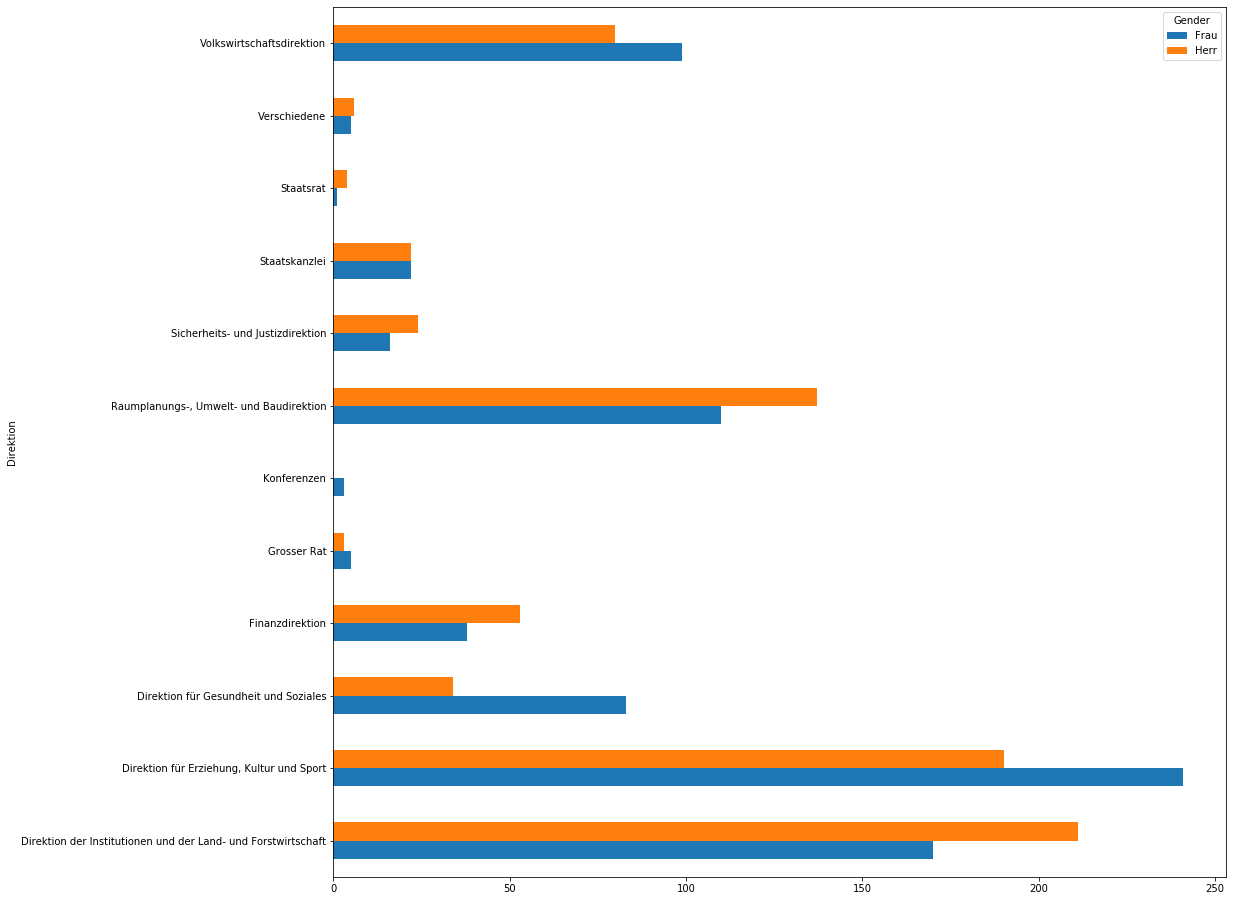

In [119]:
# Chart mit absoluten Werten nach Direktion und Geschlecht:

df.groupby('Direktion')['Gender'].value_counts().unstack().plot(kind='barh', figsize=(16, 16))


### Prozent ausrechnen.

In [107]:
# Was geht:

df['Gender'].value_counts() / df['Gender'].value_counts().sum()*100


Frau    50.994227
Herr    49.005773
Name: Gender, dtype: float64

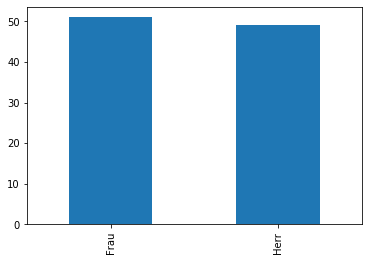

In [131]:
# Weil es so schön ist, hier ein Plot:

(df['Gender'].value_counts() / df['Gender'].value_counts().sum()*100).plot(kind='bar')

In [132]:
# Das hier gibt zwar keinen Fehler, aber stimmt auch nicht: 

(df.groupby('Direktion')['Gender'].value_counts() / df['Direktion'].value_counts().sum())*100

Direktion                                                      Gender
Direktion der Institutionen und der Land- und Forstwirtschaft  Herr      13.543004
                                                               Frau      10.911425
Direktion für Erziehung, Kultur und Sport                      Frau      15.468549
                                                               Herr      12.195122
Direktion für Gesundheit und Soziales                          Frau       5.327343
                                                               Herr       2.182285
Finanzdirektion                                                Herr       3.401797
                                                               Frau       2.439024
Grosser Rat                                                    Frau       0.320924
                                                               Herr       0.192555
Konferenzen                                                    Frau       0.192555
Raumplanungs-, Um

In [ ]:
# was nicht geht:

group = df.groupby(['Direktion', 'Gender']).value_counts()

direktion_gender = df.groupby(['Direktion', 'Gender']).agg({'Gender': 'sum'})
direktion_gender 

In [109]:
# was auch nicht geht:

group = df.groupby(['Direktion', 'Gender']).value_counts()

direktion_gender = df.groupby('Direktion')['Gender'].value_counts()
direktion_gender 
df.groupby('Direktion')['Gender'].value_counts()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [103]:
df_t = pd.DataFrame({'state': ['CA', 'WA', 'CO', 'AZ'] * 3,
                   'office_id': list(range(1, 7)) * 2,
                   'sales': [np.random.randint(100000, 999999)
                             for _ in range(12)]})

state_office = df_t.groupby(['state', 'office_id']).agg({'sales': 'sum'})
# Change: groupby state_office and divide by sum
state_pcts = state_office.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
#state_pcts
state_office

sales
state office_id        
AZ    2          651545
      4          949792
      6          997798
CA    1          147883
      3          509514
      5          807171
CO    1          512556
      3          186107
      5          497636
WA    2          862286
      4          636660
      6          896213